# Fun With R

**A few reasons why R is useful and so much fun**

- *Developed specifically for statistical computing*

- *Free and open source*:  R is issued under GNU and has no license restrictions. 

- *Packages*: there are over 6000 packages available for R, and new ones are being released often (a good place to learn about new contributions to R is the [R Journal](https://journal.r-project.org)).

- *R can perform an enormous range of statistical procedures*, especially tests, constructing linear/nonlinear models, and simulations.  It is also very useful for time series and machine learning algorithms.

- *R is made to support complex datasets*: easily handles multiple data types in the same data structure, missing data, and multidimensional data structures; many functions available to filter and transform datasets

- *Advanced graphics*: core packages support many types of data visualizations; capabilities expanded by packages such as `lattice` and `ggplot`.

- *Can be used with other languages*: a popular example is `Rcpp`, a package which allows for C++ functions to be written in R for performance purposes

R in the [New York Times](http://www.nytimes.com/2009/01/07/technology/business-computing/07program.html).

### Installation and code editors

[R](https://www.r-project.org) is available through the [Comprehensive R Archive Network](https://cran.r-project.org/mirrors.html) (CRAN).

[RStudio](https://www.rstudio.com) is a free, open-source IDE for R and is one of the most popular R editors. It provides a unified environment for writing and executing scripts, generating graphics, installing packages, and consulting documentation.  RStudio also includes support for RMarkdown, a file format which allows for Markdown text and R code/output to be combined in one document which resembles a notebook interface. 

R can also be invoked via the command line and in Jupyter (*Ju*lia-*Pyt*hon-*R*) notebooks.

**Exciting news**!
- The newest version of R (3.3.2 - "Sincere Pumpkin Patch") was released on October 31, 2016
- The newest version of RStudio (1.0) was released on November 1, 2016

## Variables, types, data structures

In R, each variable is assigned an "R Object" whose type matches that of the data contained in it.  Some common R objects are:
- *vectors*: the simplest data structure; a scalar variable in R is a vector of length 1. There are six types of vectors (sometimes referred to as the "atomic types"): `logical`, `numeric`, `integer`, `complex`, `character`, and `raw`.  All real numbers in R are stored in double-precision format.
- *factors*: object for representing the levels (in the form of strings or integers) of a categorical variable
- *lists*: collections of named elements which can be of different types
- *matrices*: elements of the same atomic type are arranged in two-dimensional, rectangular layout; dimensions can be given names
- *arrays*: multidimensional data structure of the same atomic type, i.e. a collection of matrices
- *data frames*: table/2D array-like structure in which each column stores values of one variable, and each row corresponds to one observation

**Vectors**

In [18]:
a = c(1,2,3)  # Vectors are created using the c() function (c stands for 'combine')
b = c(4,5,6)  
d = c("a","b","c")

cbind(a,b,d)  # Column-wise combination of vectors
rbind(a,b,d)  # Row-wise combination of vectors

a,b,d
1,4,a
2,5,b
3,6,c


a,1,2,3
b,4,5,6
d,a,b,c


**Lists**

In [19]:
# Lists are created using the list() function, and each element can be named
e = list(x = "R", y = c("is", "fun"), z = pi) 
e$x
str(e)     # Display the "structure" of a list, i.e. the type and value in each field
unlist(e)  # Simplify the list to a vector of type 'character'

[1] "R"

List of 3
 $ x: chr "R"
 $ y: chr [1:2] "is" "fun"
 $ z: num 3.14


x                 y1                 y2                  z 
               "R"               "is"              "fun" "3.14159265358979"

**Matrices**

In [ ]:
f = matrix(1:9, nrow = 3, ncol = 3); f

In [ ]:
det(f)     # Right answer is 0 (but Matlab says this determinant is 6.6613e-16).

In [ ]:
eigen(f)   # The third eigenvalue should be 0 (Matlab is correct)

**Data frames**

In [20]:
# These numbers are the thousands of pounds of mozzarella cheese produced in the US in each month of 1973 and 2004
mc1973 = c(30843, 27752, 31557, 31089, 35222, 33587, 31418, 30129, 27327, 31383, 30430, 34031)
mc2004 = c(215333, 204911, 226643, 222094, 242950, 222523, 214999, 216362, 214577, 217289, 211547, 225771)

q = data.frame(production1973 = mc1973, production2004 = mc2004)
head(q)                 # Print the few rows of q
summary(q)              # Calculate summary statistics for each column in q
mean(q$production1973)  # Calculate mean of 1973 data

production1973,production2004
30843,215333
27752,204911
31557,226643
31089,222094
35222,242950
33587,222523


 production1973  production2004  
 Min.   :27327   Min.   :204911  
 1st Qu.:30355   1st Qu.:214894  
 Median :31236   Median :216826  
 Mean   :31231   Mean   :219583  
 3rd Qu.:32064   3rd Qu.:223335  
 Max.   :35222   Max.   :242950  

[1] 31230.67

## Sampling and probability

Probability distributions supported by R: beta, binomial, Cauchy, exponential, chi-squared, Fisher's F, gamma, geometric, hypergeometric, lognormal, logistic, negative binomial, normal, Poisson, Wilcoxon signed rank, Student's t, uniform, Weibull, Wilcoxon rank sum.

For each of these distributions, the following functions are available:
- `r{distName}`: random number generator
- `p{distName}`: cumulative probability function
- `d{distName}`: probability density/mass function
- `q{distName}`: quantile function

**Example 1:** Draw a normal distribution with mean = 100, standard deviation = 10; shade part of distribution from x = 60 to x = 90

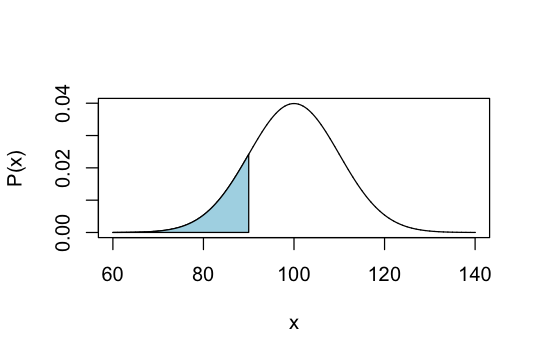

In [23]:
# Plot settings (mainly useful for Jupyter notebooks)
library(repr);  options(repr.plot.width=4.5, repr.plot.height=3)

# Plot distribution
x = seq(60, 140, 0.01)
plot(x, dnorm(x, mean=100, sd = 10), type="l", xlab="x", ylab="P(x)")

# Shade smaller region
xRegion = seq(60, 90, 0.01)
pRegion = dnorm(xRegion, mean=100, sd = 10)
polygon(c(xRegion, 90, 60), c(pRegion, min(pRegion), min(pRegion)), col = "lightblue")

**Example 2**: Draw a histogram of exponential random numbers and plot its probability density function, cumulative distribution function, and quantile (inverse CDF) function

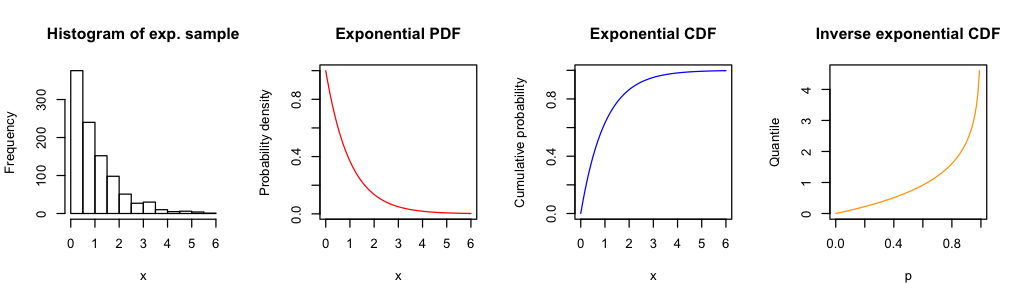

In [24]:
# Graphics commands (the first arranges the plots in a 1x4 grid)
par(mfrow=c(1,4));  options(repr.plot.width=8.5, repr.plot.height=2.5)

hist(rexp(1000), xlab="x", ylab="Frequency", main="Histogram of exp. sample")
curve(dexp, 0, 6, xlab="x", ylab="Probability density", main="Exponential PDF", col="red")
curve(pexp, 0, 6, xlab="x", ylab="Cumulative probability", main="Exponential CDF", col="blue")
curve(qexp, 0, 1, xlab="p", ylab="Quantile", main="Inverse exponential CDF", col="orange",)

**Example 3**: Multivariate normal distribution

In [27]:
library(MASS);  options(repr.plot.width=4.5, repr.plot.height=3.5);  options(warn=-1);
biNormal <- mvrnorm(1000, mu = c(0, 0), Sigma = matrix(c(1, 0, 0, 1), 2))
biNormal <- kde2d(biNormal[,1], biNormal[,2], n = 50)  # Kernel density estimate

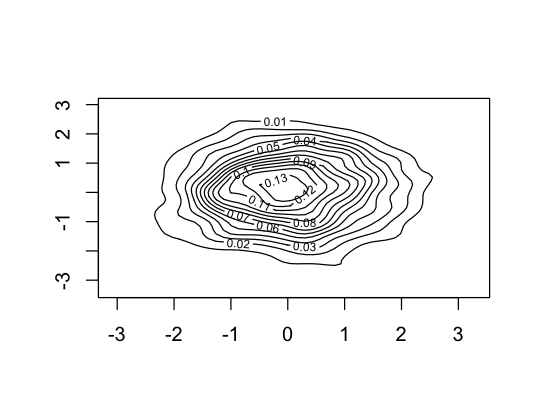

In [28]:
contour(biNormal)

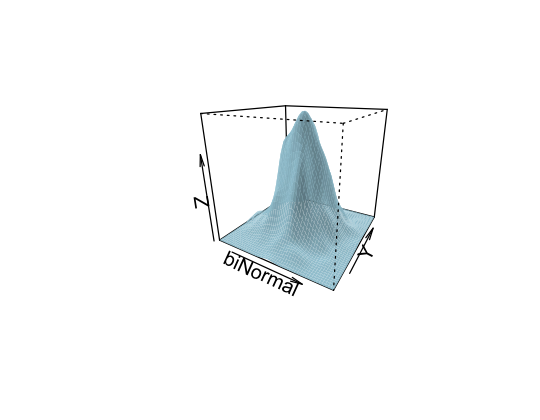

In [29]:
persp(biNormal, phi = 20, theta = 30, shade = .1, col = "lightblue", border = NA)

## Functional programming

A nice feature of R is "first-class functions": functions in R can be arguments to other functions, returned by other functions, and stored in data structures. 

The `*apply()` family of functions are composite functions, i.e. they accept a function `f` as an argument and apply `f` to every element of a data structure `x`:
- `apply(x, margin, fun, ...)` applies `f` to every element in `x`, on the dimension given by `margin` (i.e. `f` is applied to: rows if `margin` is 1, columns if `margin` is 2, both if `margin` is `c(1,2)`)
- `lapply(f, x, ...)` applies `f` to every element of `x` and returns a list with the same number of elements as`x`
- `sapply(f, x, ...)` works in the same way as `lapply`, but returns the most elementary data structure possible (the `s` stands for "simplify"), which is often a vector
- `tapply(x, groupVariable, f, ...)` groups values in `x` by unique values of `groupVariable` and applies `f` to each group
- `mapply(f, x1, x2, ...)` applies `f` to each element of structures `x1`, `x2`, ... (the `m` stands for "multivariate"); see the numerical integration example below for a demonstration

In each of these functions, `...` can be substituted with additional arguments to `f`.


**Example 1**: Numerical integration using the (composite) Simpson's rule, which approximates an integral as:
$$\int_a^b f(x)dx \approx \frac{b-a}{6}\left[ f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right ]$$


R code to approximate $\int_0^{\pi} \text{sin}(x)dx $  (the exact answer is 2):

In [30]:
# Define a function to compute an integral using Simpson's rule
simpson = function(f, a, b) {  (b-a)/6 * (f(a) + 4*f((a + b)/2) + f(b))  }

In [31]:
simpson(sin, 0, pi)   # Not a very good approximation

[1] 2.094395

In [32]:
# Divide [0,pi] into 50 sub-intervals
int = seq(0, pi, length.out=51)

# Apply Simpson's rule to each sub-interval and sum together the 50 results - (somewhat) better!
sum( mapply(function(a,b) simpson(sin,a,b), int[-length(int)], int[-1]) )

[1] 2

`int` is a vector of length 51.  The above line of code works as follows:
- `int[-length(int)]`  returns `int[1:50]`
- `int[-1]` returns `int[2:51]`
- `mapply` is the "multivariate apply" function.  For example, if `f` is a function which takes 2 arguments (in general, `f` can take any number of arguments) and `vec1`, `vec2` are vectors of length $n$, then `mapply(f, vec1, vec2)` calls `f` on each corresponding pair of elements from `vec1` and `vec2`.  That is, the result is a vector containing `f(vec1[1], vec2[1])`,  `f(vec1[2], vec2[2])`, ..., `f(vec1[n], vec2[n])`.
- Therefore, the use of `mapply` here results in a vector containing: `simpson(sin, int[1], int[2])`, `simpson(sin, int[2], int[3])`, ..., `simpson(sin, int[50], int[51]`.
- The `mapply` call is surrounded by the `sum` function so that the results of each call to the `simpson` function are summed together.

**Example 2:** Anonymous functions and mathematical functions which take other functions as arguments

In [33]:
# Find roots of a function on an interval
uniroot(f = function(x) (x-2)^3, interval = c(0,3))

$root
[1] 2.000021

$f.root
[1] 8.879583e-15

$iter
[1] 31

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

In [34]:
# Find minimum/maximum of a function on an interval  (there is also 'optimise')
optimize(f = function(x) (x-1)^2, interval = c(0,2), maximum=FALSE)

$minimum
[1] 1

$objective
[1] 0

**Example 3**: Writing a custom data summary function

In [35]:
# Create a (named) list of functions to call on a vector of data
funs = list(mean = mean, median = median, stdDev = sd, IQR = IQR)

# Apply each function to a random sample of 30 values from a Poisson distribution with mean=3
lapply(funs, function(f) f(rpois(n=30, lambda=3)))

$mean
[1] 3.033333

$median
[1] 3

$stdDev
[1] 1.784029

$IQR
[1] 2

## **Summarizing and reshaping datasets**

There are multiple functions in the R for grouping data based on one or more variables, as well as for constructing frequency and contingency tables. In the R core packages, some useful functions for these tasks are:
- The `*apply` family of functions (see previous section)
- `table(...)`:  returns a frequency table if one vector is given, and a contingency table if multiple vectors are given
- `aggregate(x, groupVariable, f)`: groups data in `x` by variable specified by one or more `groupVariable`(s) and applies function `f` to each group

The ``summary`` function can also be used to obtain descriptive statistics (quartiles, mean, minimum, maximum) for each variable in a data table.

**Example 1:** Which states have had the most university commencement addresses given by US presidents?

In [ ]:
# Read data
commencementSpeeches = read.csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/presidential-commencement-speeches/commencement_speeches.csv", header = TRUE)

# Starting from innermost command:
# - Calculate frequency table of number of speeches per state
# - Sort the frequency table in ascending order
# - Print out the last few cells of table (i.e. those with the highest count)
tail(sort(table(commencementSpeeches$state)))

**Example 2:** Do people who care a lot about grammar also tend to care a lot about the Oxford comma?

In [ ]:
# Read and reformat data so that R understands the ordinal response values
commas = read.csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/comma-survey-data/comma-survey-data.csv", 
    header = TRUE) 

# How important is grammar to the respondent? 
# Possible answers: "Not at all", "Not much", "Some", "A lot"
commaImportance = ordered(commas[,4], levels = c("Not at all", "Not much", "Some", "A lot"))

# How important is the Oxford comma to the respondent? 
grammarImportance = ordered(commas[,8], levels = c("", "Very unimportant", "Somewhat unimportant", 
                                        "Neither important nor unimportant (neutral)", 
                                        "Somewhat important", "Very important"))

In [36]:
# Calculate contingency table
table(grammarImportance, commaImportance)

                                             commaImportance
grammarImportance                             Not at all Not much Some A lot
                                                       8       14   12     6
  Very unimportant                                     2        2    1     0
  Somewhat unimportant                                 1        4    1     1
  Neither important nor unimportant (neutral)         10        9    6     1
  Somewhat important                                  54      118  127    34
  Very important                                      51      121  267   249

Version 1.0.0 of a set of packages known as the "Tidyverse", developed by Hadley Wickham, was released in September 2016 and is now included with the latest version of RStudio.  Within these packages, `dplyr` (and an earlier iteration of this, `plyr`) is particularly useful for reformatting large datasets. 

**Example 3:** On which day of the year were more children born in the US than on any other day? (For each year in 2000-2014)

In [40]:
library(plyr)

# Read data
births2000_2014 = read.csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv", header=TRUE)

# Get subset of the data for each year, set the 'births' column to be the highest number of births for that subset
birthdays = ddply(births2000_2014, "year", subset, births==max(births))

In [42]:
# Print results neatly
formattedBirthdays = apply(birthdays, 1, function(x) { cat(x[1], ":", month.abb[x[2]], x[3], fill=TRUE) })

2000 : Nov 21
2001 : Dec 28
2002 : Sep 12
2003 : Dec 30
2004 : Sep 9
2005 : Sep 7
2006 : Sep 7
2007 : Dec 27
2008 : Dec 30
2009 : Sep 9
2010 : Dec 21
2011 : Nov 11
2012 : Dec 12
2013 : Sep 4
2014 : Sep 3


**Example 4**: Filtering information from a dataset about enrollment and employment of different college majors in the US

In [45]:
library(dplyr)
collegeMajors = read.csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv", header = TRUE)

In [48]:
# Recreate the dataset with only the variables which are of interest
collegeMajorsMin = dplyr::select(collegeMajors, Major, Major_category, Total, Employed)
head(collegeMajorsMin)

Major,Major_category,Total,Employed
GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245
AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865
AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321
ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177
FOOD SCIENCE,Agriculture & Natural Resources,24280,17281
PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043


In [ ]:
# Reorder the dataset to be sorted by Major_cateogory
collegeMajorsMin = arrange(collegeMajorsMin, Major_category)

In [49]:
# Filter the dataset to include only data about Computer Science and Math disciplines
csMathStudents = filter(collegeMajorsMin, Major_category == "Computers & Mathematics")
head(csMathStudents)

Major,Major_category,Total,Employed
COMMUNICATION TECHNOLOGIES,Computers & Mathematics,62141,49609
COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,253782,218248
COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828
COMPUTER SCIENCE,Computers & Mathematics,783292,656372
INFORMATION SCIENCES,Computers & Mathematics,77805,66393
COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,39362,32366


In [51]:
# Add new column which is a function of existing columns: proportion of employed students
csMathStudents_new = mutate(csMathStudents, propEmployed = Employed/Total)
head(csMathStudents_new)

Major,Major_category,Total,Employed,propEmployed
COMMUNICATION TECHNOLOGIES,Computers & Mathematics,62141,49609,0.7983296
COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,253782,218248,0.8599822
COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,0.7786608
COMPUTER SCIENCE,Computers & Mathematics,783292,656372,0.8379659
INFORMATION SCIENCES,Computers & Mathematics,77805,66393,0.8533256
COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,39362,32366,0.8222651


## Linear/nonlinear statistical models

## **Statistical tests**

Many functions are available in R for performing a wide range of statistical tests.  A few of the popular functions are:
- `t.test`:
- `shapiro.test`:
- `var.test`:

**Example 1**: Is there a statistically significant difference between the number of American newspapers circulating in 2004 and 2013?

In [52]:
# Read data, reformat numbers which have commas as thousands separators
newspapers = read.csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv", header=T)
circulation2004 = as.numeric(gsub(",", "", newspapers$Daily.Circulation..2004))
circulation2013 = as.numeric(gsub(",", "", newspapers$Daily.Circulation..2013))

In [ ]:
# Paired t-test:
t.test(circulation2004, circulation2013, paired = TRUE, conf.level = 0.95)

In [ ]:
# Paired t-test with null hypothesis that readership in 2013 was less (i.e. 2004-2013 > 0)
t.test(circulation2004, circulation2013, paired = TRUE, alternative = "greater")

## A (much) longer example of data manipulation

What proportion of the New York Philarmonic's performances have been Beethoven, Mozart, or Mendelssohn pieces, from 1842-2016?

The following code uses features of the `tidyverse` packages to reshape a large, complex dataset (notable features: `%>%`, `map`, `ddply`, `melt`, `ggplot`)

In [8]:
library(jsonlite); library(tidyverse); library(stringr); library(plyr); library(reshape2); options(warn=-1);
NYPhil1842 = fromJSON("https://raw.githubusercontent.com/nyphilarchive/PerformanceHistory/master/Programs/json/complete.json")

# Extract concert seasons (years) and the composers who played in each season
seasons = (NYPhil1842 %>% map("season"))$programs
composers = (NYPhil1842 %>% map("works"))$programs %>% map("composerName")

In [9]:
# Count the number of times that Beethoven, Mozart, or Mendelssohn pieces were placed
beethovenCount = unlist(composers %>% map(~ sum(str_count(na.omit(.), "Beethoven"))))
mozartCount = unlist(composers %>% map(~ sum(str_count(na.omit(.), "Mozart"))))
mendelssohnCount = unlist(composers %>% map(~ sum(str_count(na.omit(.), "Mendelssohn"))))

In [10]:
# Count the total number of pieces played in each season
pieceCount = unlist(composers %>% map(~ length(na.omit(.))))

In [11]:
# Compose a data frame containing the number of Beethoven, Mozart, and Mendelssohn pieces in each concert
composersBySeason <- data_frame(season = seasons, pieceCount = pieceCount, beethoven = beethovenCount, 
                                mozart = mozartCount, mendelssohn = mendelssohnCount)

In [12]:
# Group the concerts by season, and convert counts to proportions
composersBySeason = ddply(composersBySeason,"seasons",numcolwise(sum))
composersBySeason[,3:5] = composersBySeason[,3:5]/composersBySeason$pieceCount

In [13]:
# Reshape the data frame so that there is one row per composer per season
composersBySeason = melt(composersBySeason[-NROW(composersBySeason),-2], id="seasons")

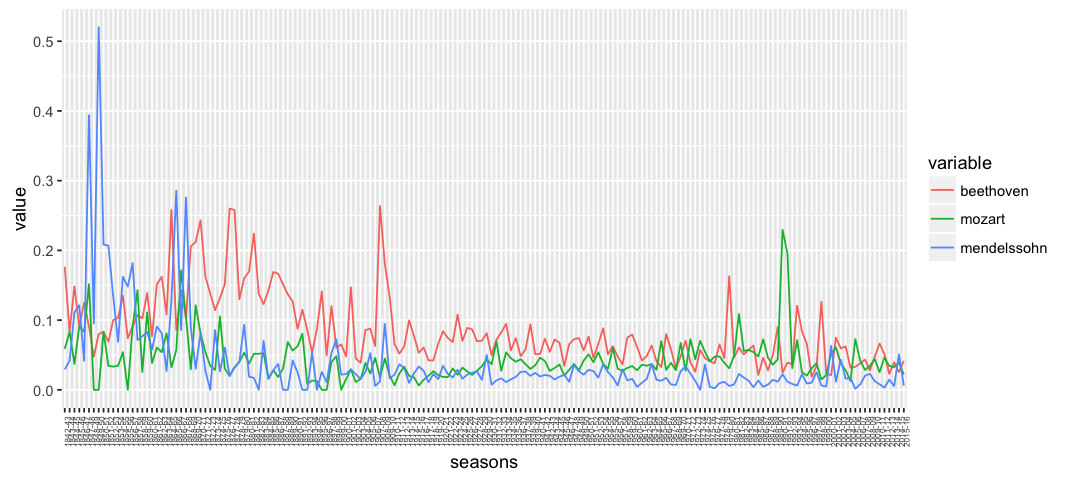

In [17]:
# Graph the proportions over time
p1 = ggplot(data=composersBySeason,  aes(x=seasons, y=value, color=variable, group=variable)) +
     geom_line() + theme(axis.text.x = element_text(size=5, angle=90))

options(repr.plot.width=9, repr.plot.height=4)
print(p1)